Author: Opal Issan (oissan@ucsd.edu)

Last modified: August 27, 2025

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from QLT_equations.dispersion_functions import * 
from queue import PriorityQueue
import math

In [3]:
%matplotlib inline
import matplotlib
font = {'family' : 'sans-serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

## Dispersion relation solver for MTSI


In [4]:
# normalization
# time is normalized to the electron cyclotron frequency 
# space is normalized to electron inertial length d_e

# cold electron density
n_e = 1  # ne
# cold proton density
n_p = 0.8  # ne
# hot proton density 
n_pH = 0.1 # ne
# beam proton density
n_O =  0.1 # ne

# mass ratios
mp_me = 100 # dimensionless
mO_me = 100 * 16 # dimensionless
omega_pe = 2 # wce
omega_ce = 1 # wce

# assume the plasma is isothermal Te=Tp
betae = 1e-4
alpha_e_par = np.sqrt(betae) # d_e x wce
alpha_p_par = alpha_e_par / np.sqrt(mp_me)  # d_e x wce
alpha_pH_par = np.sqrt(1e4) * alpha_e_par / np.sqrt(mp_me)  # d_e x wce
alpha_O_par = alpha_e_par / np.sqrt(mO_me)  # d_e x wce

# gyroradius
rhop = alpha_e_par * np.sqrt(mp_me) / np.sqrt(2)
rhoe = alpha_e_par / np.sqrt(2)

# relative drift
UD_p = 1e-3 * omega_pe
UD_pH = 1e-3 * omega_pe
UD_O = -1.5e-3 * omega_pe

In [5]:
print("current = ", UD_O*n_O + UD_p*n_p) 
print("(vbeam - vcore)/vti = ", (UD_O - UD_p)/(alpha_p_par/np.sqrt(2)))

current =  0.0013
(vbeam - vcore)/vti =  -7.0710678118654755


In [6]:
UD_O/ (alpha_O_par/np.sqrt(2))

-16.970562748477143

In [7]:
UD_p / (alpha_p_par/np.sqrt(2))

2.8284271247461903

# electron/proton instability 

In [8]:
k_perp_vec_p = np.abs(np.linspace(0.01, 0.75, 200) /rhoe) # d_e
k_par_vec_p = np.abs(np.linspace(0.001, 0.07, 300) /rhoe) # d_e

In [9]:
kpar0 = 0.018509254627313655 / rhoe
kper0 = 0.44222111055527763 / rhoe
gamma0 = 0.11598813520502371 / np.sqrt(mp_me)
omega0 = 0.23803350718440489 / np.sqrt(mp_me)

In [10]:
sol_cold_p = solve_dispersion_on_grid(k_perp_vec=k_perp_vec_p, k_par_vec=k_par_vec_p, k_par_0=kpar0, k_perp_0=kper0, omega_0=omega0, gamma_0=gamma0,
                             n_p_=n_p, n_O_=n_O, n_pH_=n_pH, omega_pe_=omega_pe, omega_ce_=omega_ce, mp_me_=mp_me, mO_me_=mO_me,
                             UD_p_=UD_p, UD_pH_=UD_pH, UD_O_=UD_O, alpha_e_par_=alpha_e_par, alpha_p_par_=alpha_p_par, alpha_pH_par_=alpha_pH_par,
                             alpha_O_par_=alpha_O_par, electron_response_="cold")

sol_hot_p = solve_dispersion_on_grid(k_perp_vec=k_perp_vec_p, k_par_vec=k_par_vec_p, k_par_0=kpar0, k_perp_0=kper0, omega_0=omega0, gamma_0=gamma0,
                             n_p_=n_p, n_O_=n_O, n_pH_=n_pH, omega_pe_=omega_pe, omega_ce_=omega_ce, mp_me_=mp_me, mO_me_=mO_me,
                             UD_p_=UD_p, UD_pH_=UD_pH, UD_O_=UD_O, alpha_e_par_=alpha_e_par, alpha_p_par_=alpha_p_par, alpha_pH_par_=alpha_pH_par,
                             alpha_O_par_=alpha_O_par, n_max_=10, electron_response_="hot")

root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!


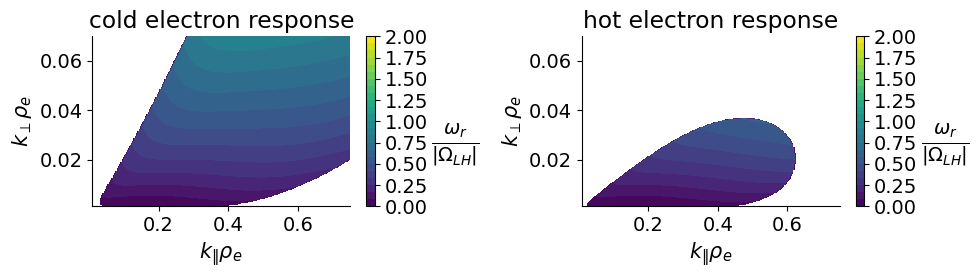

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
pos = ax[0].contourf(k_perp_vec_p*rhoe, k_par_vec_p*rhoe, 
                  sol_cold_p.real.T * np.sqrt(mp_me), vmin=1e-5, vmax=2, levels=np.linspace(1e-5, 2, 25))

cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\omega_{r}}{|\Omega_{LH}|}$', labelpad=20, rotation=0, fontsize=20)
ax[0].set_xlabel(r'$k_{\|} \rho_{e}$', fontsize=15)
ax[0].set_ylabel(r'$k_{\perp} \rho_{e}$', fontsize=15)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_title("cold electron response")


pos = ax[1].contourf(k_perp_vec_p*rhoe, k_par_vec_p*rhoe, 
                  sol_hot_p.real.T * np.sqrt(mp_me), vmin=1e-5, vmax=2, levels=np.linspace(1e-5, 2, 25))
ax[1].set_title("hot electron response")
cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\omega_{r}}{|\Omega_{LH}|}$', labelpad=20, rotation=0, fontsize=20)
ax[1].set_xlabel(r'$k_{\|} \rho_{e}$', fontsize=15)
ax[1].set_ylabel(r'$k_{\perp} \rho_{e}$', fontsize=15)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig("figures/linear_theory/patrick/frequency_proton_" + str(n_O)+ ".png")

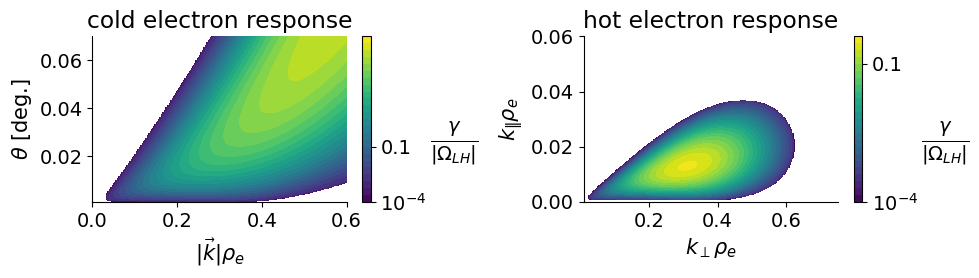

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
pos = ax[0].contourf(k_perp_vec_p*rhoe, k_par_vec_p*rhoe, 
                  sol_cold_p.imag.T * np.sqrt(mp_me), vmin=1E-4, vmax=0.3, levels=np.linspace(1e-4, 0.3, 25))

cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{LH}|}$', labelpad=20, rotation=0, fontsize=20)
ax[0].set_xlabel(r'$|\vec{k}| \rho_{e}$', fontsize=15)
ax[0].set_ylabel(r'$\theta$ [deg.]', fontsize=15)
cbar.set_ticks([1e-4, 0.1])
cbar.set_ticklabels(["$10^{-4}$", "0.1"])
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[0].set_title("cold electron response")


pos = ax[1].contourf(k_perp_vec_p*rhoe, k_par_vec_p*rhoe, 
                  sol_hot_p.imag.T * np.sqrt(mp_me), vmin=1E-4, vmax=0.12, levels=np.linspace(1e-4, 0.12, 25))

cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{LH}|}$', labelpad=20, rotation=0, fontsize=20)
ax[1].set_xlabel(r'$k_{\perp} \rho_{e}$', fontsize=15)
ax[1].set_title("hot electron response")
ax[1].set_ylabel(r'$k_{\|} \rho_{e}$', fontsize=15)
cbar.set_ticks([1e-4, 0.1])
ax[1].set_ylim(0, 0.06)
ax[0].set_xlim(0, 0.6)
cbar.set_ticklabels(["$10^{-4}$", "0.1"])
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig("figures/linear_theory/patrick/growth_rate_proton_" + str(n_O)+ ".png")

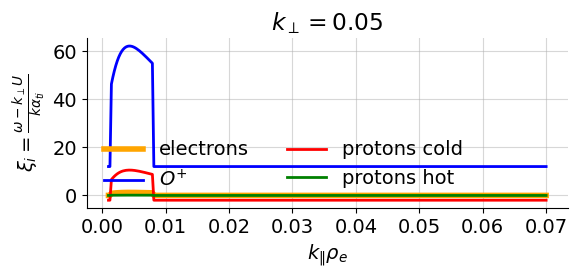

In [15]:
fig, ax = plt.subplots(figsize=(6, 3))

ii = 11
plt.plot(k_par_vec_p*rhoe, ((sol_cold_p[ii, :])/k_par_vec_p/alpha_e_par).real, linewidth=4, color="orange", label="electrons")
plt.plot(k_par_vec_p*rhoe, ((sol_cold_p[ii, :] - k_par_vec_p * UD_O)/k_par_vec_p/alpha_O_par).real, linewidth=2, color="blue", label="$O^{+}$")
plt.plot(k_par_vec_p*rhoe, ((sol_cold_p[ii, :] - k_par_vec_p * UD_p)/k_par_vec_p/alpha_p_par).real, linewidth=2, color="red", label="protons cold")
plt.plot(k_par_vec_p*rhoe, ((sol_cold_p[ii, :] - k_par_vec_p * UD_pH)/k_par_vec_p/alpha_pH_par).real, linewidth=2, color="green", label="protons hot")

ax.set_xlabel(r"$k_{\|} \rho_{e}$")
ax.set_ylabel(r"$\xi_{i} = \frac{\omega - k_{\perp} U}{k \alpha_{ti}}$")


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.grid(alpha=0.5)
plt.legend(frameon=False, ncol=2, loc="lower left")
ax.set_title(r"$k_{\perp} = $" + str(round(k_perp_vec_p[ii]*rhoe, 2)))
plt.tight_layout()

# electron/Oxygen instability 

In [16]:
kpar0 = 0.0 / rhoe
kper0 = 0.17708854427213605 / rhoe / np.sqrt(2)

gamma0 = 0.11598813520502371 / np.sqrt(mp_me)
omega0 = -0.45803350718440489 / np.sqrt(mp_me)

In [17]:
k_perp_vec_O = np.abs(np.linspace(0.01, 0.75, 400) /rhoe) # d_e
k_par_vec_O = np.abs(np.linspace(0.001, 0.07, 500) /rhoe) # d_e

In [18]:
sol_cold_O = solve_dispersion_on_grid(k_perp_vec=k_perp_vec_O, k_par_vec=k_par_vec_O, k_par_0=kpar0, k_perp_0=kper0, omega_0=omega0, gamma_0=gamma0,
                             n_p_=n_p, n_O_=n_O, n_pH_=n_pH, omega_pe_=omega_pe, omega_ce_=omega_ce, mp_me_=mp_me, mO_me_=mO_me,
                             UD_p_=UD_p, UD_pH_=UD_pH, UD_O_=UD_O, alpha_e_par_=alpha_e_par, alpha_p_par_=alpha_p_par, alpha_pH_par_=alpha_pH_par,
                             alpha_O_par_=alpha_O_par, electron_response_="cold")

sol_hot_O = solve_dispersion_on_grid(k_perp_vec=k_perp_vec_O, k_par_vec=k_par_vec_O, k_par_0=kpar0, k_perp_0=kper0, omega_0=omega0, gamma_0=gamma0,
                             n_p_=n_p, n_O_=n_O, n_pH_=n_pH, omega_pe_=omega_pe, omega_ce_=omega_ce, mp_me_=mp_me, mO_me_=mO_me,
                             UD_p_=UD_p, UD_pH_=UD_pH, UD_O_=UD_O, alpha_e_par_=alpha_e_par, alpha_p_par_=alpha_p_par, alpha_pH_par_=alpha_pH_par,
                             alpha_O_par_=alpha_O_par, n_max_=10, electron_response_="hot")

root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not work!
root did not

TypeError: Length of x (400) must match number of columns in z (200)

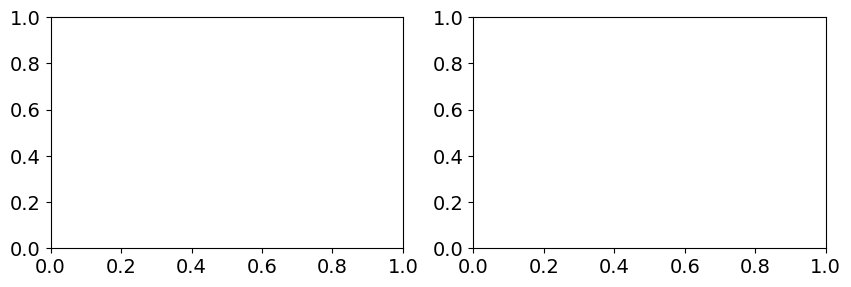

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
pos = ax[0].contourf(k_perp_vec_O*rhoe, k_par_vec_O*rhoe, 
                  sol_cold_p.real.T * np.sqrt(mp_me), vmin=-2, vmax=-1e-5, levels=np.linspace(-2, -1e-5, 25))

cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{LH}|}$', labelpad=20, rotation=0, fontsize=20)
ax[0].set_xlabel(r'$|\vec{k}| \rho_{e}$', fontsize=15)
ax[0].set_ylabel(r'$\theta$ [deg.]', fontsize=15)

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[0].set_title("cold electron response")


pos = ax[1].contourf(k_perp_vec_O*rhoe, k_par_vec_O*rhoe, 
                  sol_hot_p.real.T * np.sqrt(mp_me), vmin=-2, vmax=-1e-5, levels=np.linspace(-2, -1e-5, 25))

cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{LH}|}$', labelpad=20, rotation=0, fontsize=20)
ax[1].set_xlabel(r'$k_{\perp} \rho_{e}$', fontsize=15)
ax[1].set_title("hot electron response")
ax[1].set_ylabel(r'$k_{\|} \rho_{e}$', fontsize=15)

ax[1].set_ylim(0, 0.06)
ax[0].set_xlim(0, 0.6)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig("figures/linear_theory/patrick/frequency_oxygen_" + str(n_O)+ ".png")

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
pos = ax[0].contourf(k_perp_vec_O*rhoe, k_par_vec*_Orhoe, 
                  sol_cold_O.imag.T * np.sqrt(mp_me), vmin=1E-4, vmax=0.3, levels=np.linspace(1e-4, 0.3, 25))

cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{LH}|}$', labelpad=20, rotation=0, fontsize=20)
ax[0].set_xlabel(r'$|\vec{k}| \rho_{e}$', fontsize=15)
ax[0].set_ylabel(r'$\theta$ [deg.]', fontsize=15)
cbar.set_ticks([1e-4, 0.1])
cbar.set_ticklabels(["$10^{-4}$", "0.1"])
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[0].set_title("cold electron response")


pos = ax[1].contourf(k_perp_vec_O*rhoe, k_par_vec_O*rhoe, 
                  sol_hot_O.imag.T * np.sqrt(mp_me), vmin=1E-4, vmax=0.12, levels=np.linspace(1e-4, 0.12, 25))

cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{LH}|}$', labelpad=20, rotation=0, fontsize=20)
ax[1].set_xlabel(r'$k_{\perp} \rho_{e}$', fontsize=15)
ax[1].set_title("hot electron response")
ax[1].set_ylabel(r'$k_{\|} \rho_{e}$', fontsize=15)
cbar.set_ticks([1e-4, 0.1])
ax[1].set_ylim(0, 0.06)
ax[0].set_xlim(0, 0.6)
cbar.set_ticklabels(["$10^{-4}$", "0.1"])
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig("figures/linear_theory/patrick/growth_rate_oxygen_" + str(n_O)+ ".png")

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))

ii = 11
plt.plot(k_par_vec_O*rhoe, ((sol_cold_p[ii, :])/k_par_vec_O/alpha_e_par).real, linewidth=4, color="orange", label="electrons")
plt.plot(k_par_vec_O*rhoe, ((sol_cold_p[ii, :] - k_par_vec_O * UD_O)/k_par_vec_O/alpha_O_par).real, linewidth=2, color="blue", label="$O^{+}$")
plt.plot(k_par_vec_O*rhoe, ((sol_cold_p[ii, :] - k_par_vec_O * UD_p)/k_par_vec_O/alpha_p_par).real, linewidth=2, color="red", label="protons cold")
plt.plot(k_par_vec_O*rhoe, ((sol_cold_p[ii, :] - k_par_vec_O * UD_pH)/k_par_vec_O/alpha_pH_par).real, linewidth=2, color="green", label="protons hot")

ax.set_xlabel(r"$k_{\|} \rho_{e}$")
ax.set_ylabel(r"$\xi_{i} = \frac{\omega - k_{\perp} U}{k \alpha_{ti}}$")


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.grid(alpha=0.5)
ax.set_ylim(-10, 10)
plt.legend(frameon=False, ncol=2, loc="lower left")
ax.set_title(r"$k_{\perp} = $" + str(round(k_perp_vec_O[ii]*rhoe, 2)))
plt.tight_layout()

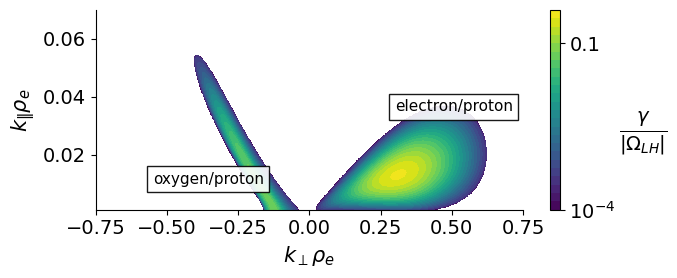

In [42]:
fig, ax = plt.subplots(figsize=(7, 3))

pos1 = ax.contourf(-k_perp_vec_O*rhoe, k_par_vec_O*rhoe, 
                  sol_hot_O.imag.T * np.sqrt(mp_me), vmin=1E-4, vmax=0.12, levels=np.linspace(1e-4, 0.12, 25))

pos2 = ax.contourf(k_perp_vec_p*rhoe, k_par_vec_p*rhoe, 
                  sol_hot_p.imag.T * np.sqrt(mp_me), vmin=1E-4, vmax=0.12, levels=np.linspace(1e-4, 0.12, 25))


plt.text(0.3, 0.035, 'electron/proton',  fontsize=11, color='black', bbox=dict(facecolor='white', edgecolor='black', linewidth=1, alpha=0.9))
plt.text(-0.55, 0.01, 'oxygen/proton',  fontsize=11, color='black', bbox=dict(facecolor='white', edgecolor='black', linewidth=1, alpha=0.9))

cbar = fig.colorbar(pos1)
cbar.ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{LH}|}$', labelpad=20, rotation=0, fontsize=20)
ax.set_xlabel(r'$k_{\perp} \rho_{e}$', fontsize=15)

ax.set_ylabel(r'$k_{\|} \rho_{e}$', fontsize=15)
cbar.set_ticks([1e-4, 0.1])

cbar.set_ticklabels(["$10^{-4}$", "0.1"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig("figures/linear_theory/patrick/patrick_fig1_replicate.png", dpi=400)